# Case Study: How Does a Bike-Share Navigate Speedy Success? 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#ask">Ask</a></li>
<li><a href="#Prepare">Prepare</a></li>
<li><a href="#Process">Process</a></li>
<li><a href="#Share">Share</a></li>
<li><a href="#Act">Act</a></li>
</ul>

<a id='intro'></a>
## Introduction

This case study is a required project for the “Google Data Analytics Professional Certificate”. We will use date from a fiction company called Cyclist to povide insights for the management about the behaviour of user types


<a id='Ask'></a>
## Ask

Many different questions can be asked with this dataset, but I have been assigned to
“How do annual members and casual riders use Cyclistic bikes differently?” In order to get insights from this data, the following questions will be answered:

* 1. What is the average lenght of rides per day of the week?
* 2. What is the total average lenght of rides?
* 3. What is the total number od rides per member type?
* 4. What is the total number od rides per member type and month?
* 5. What is the total number od rides per member type and day of the week?

Let's find out!


<a id='wrangling'></a>
## Prepare

> In this section of the report, I will load in the data, check for cleanliness, and then trim and clean my dataset for analysis. 

### General Properties

I have used “Cyclistic’s historical trip” data to analyze and identify trends. The data has been made available by Motivate International Inc, on a website and I downloaded the previous 12 months of Cyclistic trip data, from August 2021 to July 2022.  

There is no way to know if the data is original or reliable since it has been made available by Amazon, but for the purpose of this case study is trustworthy enough. The data is comprehensive even though it doesn’t contain any personal information. 

The data belongs to a public dataset under the following license: “Bikeshare hereby grants to you a non-exclusive, royalty-free, limited, perpetual license to access, reproduce, analyze, copy, modify, distribute in your product or service and use the Data for any lawful purpose (“License”).” More information about it can be found at https://ride.divvybikes.com/data-license-agreement.  

Now, let's begin to prepare our data for analysis

<a id='Process'></a>
## Process

> I have chosen to use python to clean and prepare my data. Later on, I will add the data into Tableau to create the visualizations. 

In [1]:
# Import statements for all of the packages that I plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
os.chdir("/Users/juliana.antunes_dp6/Downloads/tripdata")

# 'magic word' to plot my visualizations
%matplotlib inline

In [2]:
#Combine all 12 csv in one file
#Using os to match the pattern that I am using‘csv’
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

In [3]:
# Loading data
df = pd.concat([pd.read_csv(f) for f in all_filenames ])
df.head(2)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_lenght,week_day,month
0,99103BB87CC6C1BB,electric_bike,2021-08-10 17:15:49,2021-08-10 17:22:44,NaN,NaN,NaN,NaN,41.77,-87.68,41.77,-87.68,member,NaN,NaN,NaN
1,EAFCCCFB0A3FC5A1,electric_bike,2021-08-10 17:23:14,2021-08-10 17:39:24,NaN,NaN,NaN,NaN,41.77,-87.68,41.77,-87.63,member,NaN,NaN,NaN


In [4]:
#The shape function will give me the number of columns and rows in my dataset
df.shape

(39671072, 16)

Now, to get a concise summary of the df, that is, a quick overview of the dataset when doing exploratory analysis of the data, we use the .info() function

In [5]:
#Checking for information on the dataset, like duplicated entries and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39671072 entries, 0 to 9257236
Data columns (total 16 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
 13  ride_lenght         float64
 14  week_day            object 
 15  month               object 
dtypes: float64(5), object(11)
memory usage: 5.0+ GB


Now let's use the isnull function to see the if we have and which are the exact features and counts of rows cointaining Null Values

In [6]:
# Check for null values. 
df.isnull().sum()

ride_id                      1
rideable_type         33769609
started_at            25414020
ended_at              25414020
start_station_name      860786
start_station_id      34630393
end_station_name        919896
end_station_id        34689505
start_lat             33769609
start_lng             33769609
end_lat               33775199
end_lng               33775199
member_casual                0
ride_lenght            5901463
week_day               5901463
month                  5901463
dtype: int64

Now, we're going to check if the dataset contains duplications

In [7]:
#Checking for duplicated entries
df.duplicated().sum()

24511370

> In this section of the report, I will clean the erros I found on the section above in order to start my analysis

Since there is enough rows not to compromise the study, I will remove the data with null values from our dataset

In [8]:
#Finding out which columns now have null values
na=df.isna().sum()

#Displaying only the null containing columns names along with the count of null values
print(na[na>0])

ride_id                      1
rideable_type         33769609
started_at            25414020
ended_at              25414020
start_station_name      860786
start_station_id      34630393
end_station_name        919896
end_station_id        34689505
start_lat             33769609
start_lng             33769609
end_lat               33775199
end_lng               33775199
ride_lenght            5901463
week_day               5901463
month                  5901463
dtype: int64


In [9]:
#Dropping the null values
df.dropna(subset=["start_station_name","start_station_id","end_station_name","end_station_id","end_lat","end_lng"], inplace=True)  

#Checking the amount of null values after dropping
na=df.isna().sum()
print(na[na>0])

ride_lenght    4629230
week_day       4629230
month          4629230
dtype: int64


In [10]:
df.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
ride_lenght           float64
week_day               object
month                  object
dtype: object

Now we need to change the started_at and ended_at columns to time and create two new columns, as requested on the excercise.

In [11]:
df['ended_at'] = pd.to_datetime(df['ended_at'])
df['started_at'] = pd.to_datetime(df['started_at'])

> To have the information in secons, we have to transform the column of time into timestamp, and after that divide it by 10^9  to transform it from nanoseconds to seconds

In [12]:
df['ride_lenght'] = (df['ended_at'].astype('int64') // 10**9) - (df['started_at'].astype('int64') // 10**9)
df.head(5)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_lenght,week_day,month
30,DD06751C6019D865,classic_bike,2021-08-08 17:21:26,2021-08-08 17:25:37,Desplaines St & Kinzie St,TA1306000003,Kingsbury St & Kinzie St,KA1503000043,41.888716,-87.644448,41.889177,-87.638506,member,251,NaN,NaN
36,79973DC3B232048F,classic_bike,2021-08-27 08:53:52,2021-08-27 09:18:29,Larrabee St & Armitage Ave,TA1309000006,Michigan Ave & Oak St,13042,41.918084,-87.643749,41.900960,-87.623777,member,1477,NaN,NaN
40,0249AD4B258806AD,classic_bike,2021-08-08 12:59:18,2021-08-08 12:59:55,Aberdeen St & Jackson Blvd,13157,Aberdeen St & Jackson Blvd,13157,41.877726,-87.654787,41.877726,-87.654787,member,37,NaN,NaN
72,F41EB054E44ACFDA,classic_bike,2021-08-12 16:52:09,2021-08-12 16:56:51,Michigan Ave & Oak St,13042,Michigan Ave & Oak St,13042,41.900960,-87.623777,41.900960,-87.623777,casual,282,NaN,NaN
121,B149E6C71A1C3B14,classic_bike,2021-08-23 15:33:04,2021-08-23 16:09:00,Michigan Ave & Oak St,13042,Michigan Ave & Oak St,13042,41.900960,-87.623777,41.900960,-87.623777,casual,2156,NaN,NaN


In [13]:
df['ride_lenght'].describe()

count    4.629230e+06
mean     1.110268e+03
std      4.920460e+03
min     -7.745000e+03
25%      3.840000e+02
50%      6.730000e+02
75%      1.211000e+03
max      2.497750e+06
Name: ride_lenght, dtype: float64

In [14]:
#calculate the day of the week of the trip
df['week_day'] = df['started_at'].dt.day_name()

#calculate the month of the trip
df['month'] = df['started_at'].dt.month_name()

In [15]:
#We can see that some ride lenghts have negative values, lets dropp these rows since they can impare our analysis

index_num = df[df['ride_lenght']<0].index
df = df.drop(index_num)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4628395 entries, 30 to 823314
Data columns (total 16 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
 13  ride_lenght         int64         
 14  week_day            object        
 15  month               object        
dtypes: datetime64[ns](2), float64(4), int64(1), object(9)
memory usage: 600.3+ MB


In [16]:
#Let's check how our data is so far
df.head(4)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_lenght,week_day,month
30,DD06751C6019D865,classic_bike,2021-08-08 17:21:26,2021-08-08 17:25:37,Desplaines St & Kinzie St,TA1306000003,Kingsbury St & Kinzie St,KA1503000043,41.888716,-87.644448,41.889177,-87.638506,member,251,Sunday,August
36,79973DC3B232048F,classic_bike,2021-08-27 08:53:52,2021-08-27 09:18:29,Larrabee St & Armitage Ave,TA1309000006,Michigan Ave & Oak St,13042,41.918084,-87.643749,41.900960,-87.623777,member,1477,Friday,August
40,0249AD4B258806AD,classic_bike,2021-08-08 12:59:18,2021-08-08 12:59:55,Aberdeen St & Jackson Blvd,13157,Aberdeen St & Jackson Blvd,13157,41.877726,-87.654787,41.877726,-87.654787,member,37,Sunday,August
72,F41EB054E44ACFDA,classic_bike,2021-08-12 16:52:09,2021-08-12 16:56:51,Michigan Ave & Oak St,13042,Michigan Ave & Oak St,13042,41.900960,-87.623777,41.900960,-87.623777,casual,282,Thursday,August


> Now we can calculate some basic statisctics for our analysis

In [17]:
pd.DataFrame(df['ride_lenght'].describe().apply(lambda x: format(x, 'f')))

,ride_lenght
count,4628395.000000
mean,1110.333685
std,4920.856651
min,0.000000
25%,384.000000
50%,673.000000
75%,1211.000000
max,2497750.000000


Now, I am going to export my data to upload it to Tableau and get some insights

In [18]:
#statistical summary of the ride lenght per Members

pd.DataFrame(df.loc[df['member_casual'] == 'member', 'ride_lenght'].describe().apply(lambda x: format(x,'f'))).rename(columns={'ride_lenght':'Members_trip_duration'})

,Members_trip_duration
count,2679361.000000
mean,756.066564
std,1059.629701
min,0.000000
25%,323.000000
50%,550.000000
75%,939.000000
max,89575.000000


In [19]:
#statistical summary of the ride lenght per casual riders

pd.DataFrame(df.loc[df['member_casual'] == 'casual', 'ride_lenght'].describe().apply(lambda x: format(x,'f'))).rename(columns={'ride_lenght':'CasualRiders_trip_duration'})

,CasualRiders_trip_duration
count,1949034.000000
mean,1597.349053
std,7453.187663
min,0.000000
25%,520.000000
50%,907.000000
75%,1670.000000
max,2497750.000000


In [20]:
#droping columns that won't be used for visualization to reduce the file size
df.drop(['start_lat','start_lng','end_lat','end_lng','rideable_type','start_station_id','end_station_id','started_at','ended_at'], axis=1, inplace=True)

In [22]:
#Exporting data to csv
df.to_csv( "df_analysis.csv", index=False, header=True, encoding='utf-8-sig')

<a id='Share'></a>
## Share

> I have used Tableau to create vizualizations and get even more insights about the dataset, therefore I will load the images here and commnet on each of them

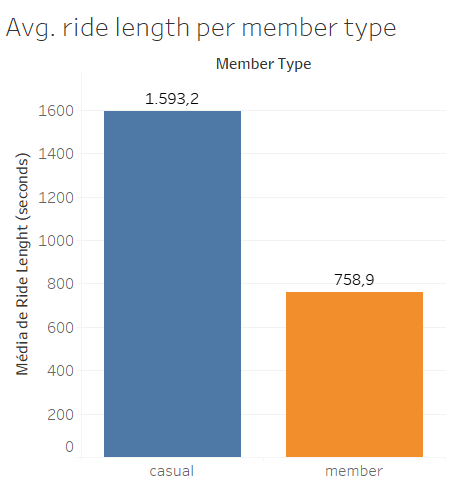

In [24]:
from IPython.display import Image
Image(filename='avg_lenght.png')

Casual users often travel longer distances than members

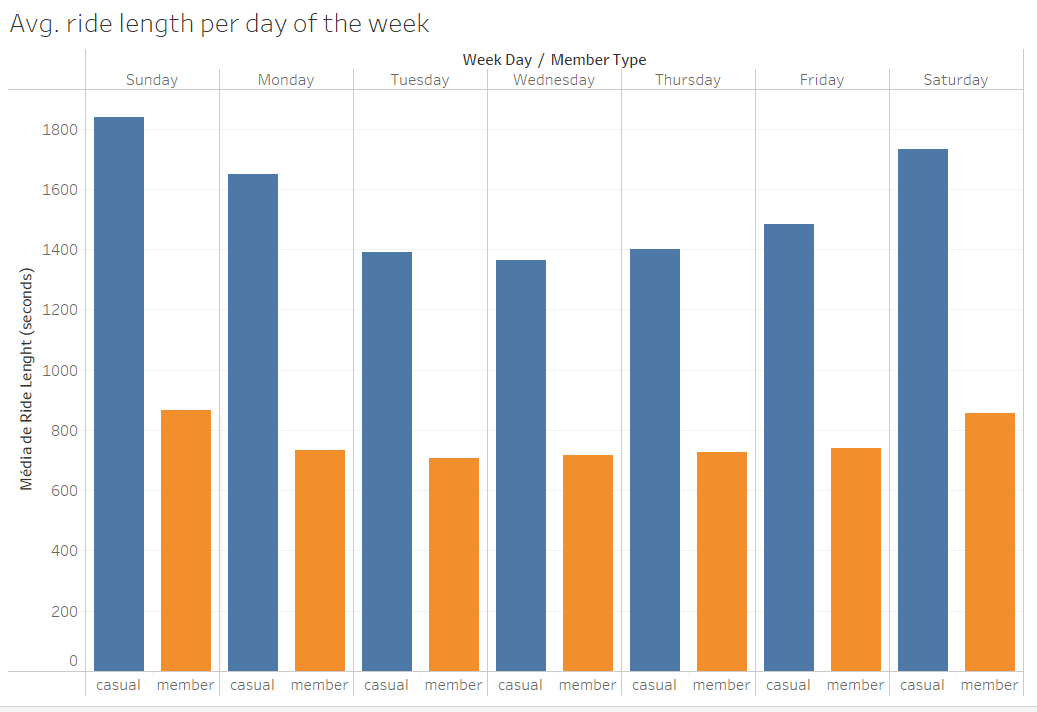

In [25]:
from IPython.display import Image
Image(filename='avg.ride.lenght_WD.png')

Weekends are the most popular days of the week for both members type, but casual users have a more significant increase on the duration of the rides. 

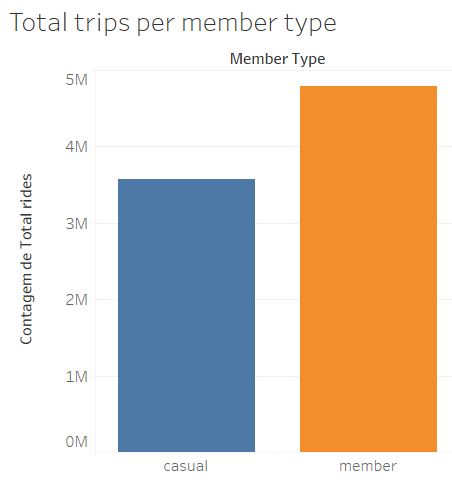

In [26]:
from IPython.display import Image
Image(filename='total_trips_member_type.png')

Looking at the total number of rides by user type, we see that members have a higher total number of rides than casual users.

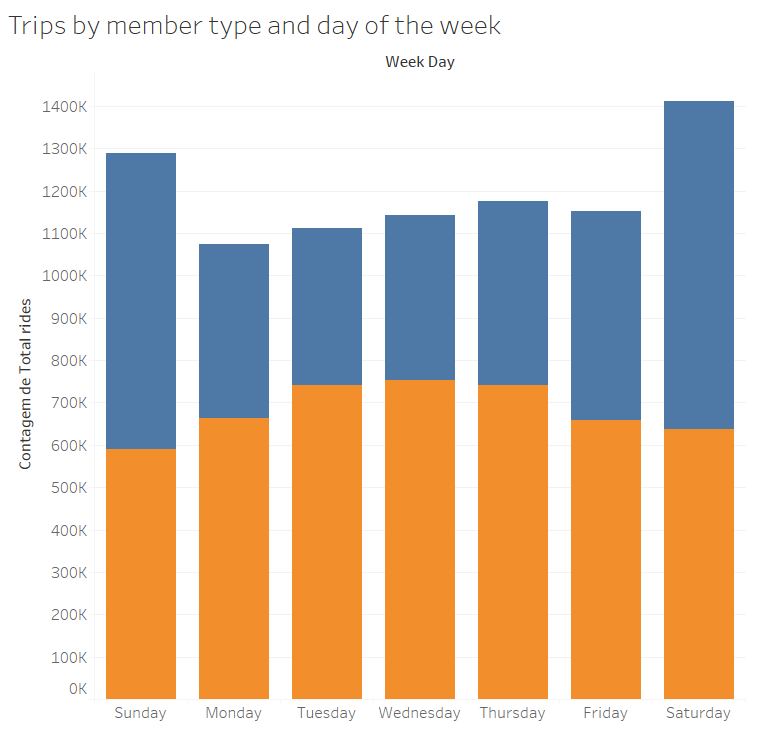

In [27]:
from IPython.display import Image
Image(filename='trips_by_member_type_WD.png')

The behavior noticed in the total number of trips by user types is maintained when we look at the data by days of the week. In genral, members have a larger number of total rides, except for Sunday.

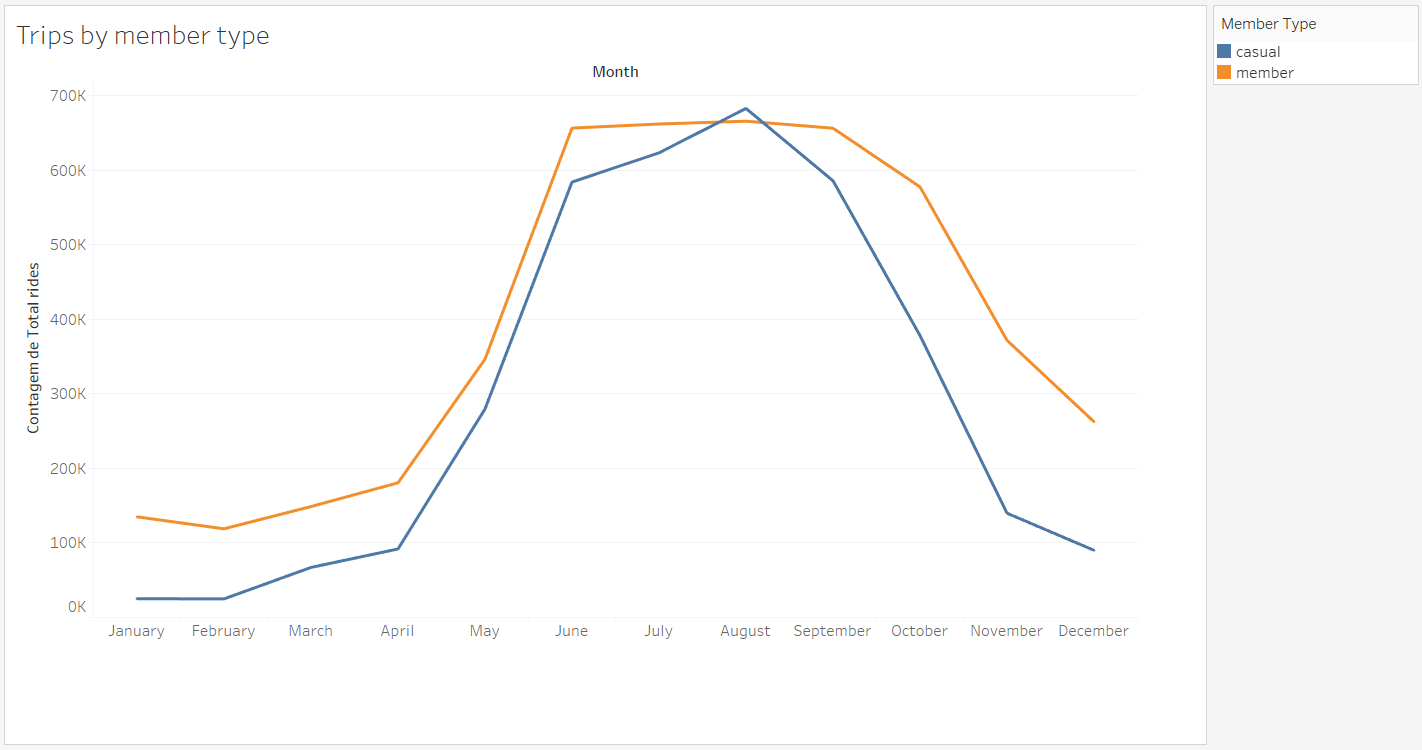

In [28]:
from IPython.display import Image
Image(filename='trips_by_member_type_month.png')

The distribution over the year appears reasonably equal across user types. The number of rides starts to increase in April, peaks between July and August and then starts to decline. This behavior makes sense, if we think about the seasons of the year, where we have more trips in the summer.

<a id='Act'></a>
## Act

Now it's time to shere some of the most interesting findins of my analysis and provide recommendations.

### Key discoveries

The goal of the analysis was to answer the larger question “How do annual members and casual riders use Cyclistic bikes differently?” Therefore, here are some insights of how they differ from each other.

1. The average total travel time is 18.5 minutes (1110 seconds). The average travel time for members is 12.6 minutes (756 seconds), while that of casual users is 26.61 minutes (1597 seconds). Therefore, we can infer that the average travel time of casual users is higher. This can be seen both in the statistics and in Graph 1;

2. The average travel time is longer on weekends, however, for casual users, we see a more significant increase;

3. The total number of trips for members is higher than for casual users;

4. The behavior noticed in the total number of trips by user type is maintained when we look at the data by days of the week. In general, members have a larger number of total rides, except for Sunday;

5. The distribution over the year appears reasonably equal across user types. The number of rides starts to increase in April, peaks between July and August, and then starts to decline. This behavior makes sense if we think about the seasons of the year, where we have more trips in the summer. Only in August, the number of rides of casual users is bigger.

> Recommendations

1. Offer discounted weekday memberships as members use bikes more on these days;
2. Create quarterly membership promotions for the months where there are fewer rides, from January to April, for example;
3. Since the average travel time is longer on weekends, there can be some kind of campaing to attract these casual users based on the ride distance.

> Additional data that could be used to expand the analysis

1. Age
2. Residential vs commercial areas
3. Genre